In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.metrics import mean_squared_error

file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\7_week\abalone_test\abalone.csv"
df = pd.read_csv(file_path)

In [47]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [49]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [51]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [53]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [55]:
df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [74]:
df = df.drop('Sex', axis=1) # Sex은 Rings와 연관이 없어보여 삭제

In [76]:
X = df.drop('Rings', axis=1).values
y = df['Rings'].values

In [78]:
X.shape, y.shape

((4177, 8), (4177,))

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

In [87]:
x_train = torch.tensor(X_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # 차원 추가
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # 차원 추가

In [90]:
train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(x_test,y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([3341, 8]),
 torch.Size([836, 8]),
 torch.Size([3341, 1]),
 torch.Size([836, 1]))

In [97]:
class Abalone(nn.Module):
    def __init__(self):
        super(Abalone, self).__init__()
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [99]:
model = Abalone()

In [102]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [104]:
# loss, accuracy 기록
train_losses = []
test_accuracies = []

# 반복학습
num_epochs = 30
for epoch in range(num_epochs):
    model.train()  # Training mode
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_dataloader))
    print(f"Epoch {epoch + 1}, Loss: {train_losses[-1]:.4f}")

Epoch 1, Loss: 40.8456
Epoch 2, Loss: 8.4147
Epoch 3, Loss: 6.6891
Epoch 4, Loss: 5.9547
Epoch 5, Loss: 5.5073
Epoch 6, Loss: 5.1726
Epoch 7, Loss: 4.9123
Epoch 8, Loss: 4.7049
Epoch 9, Loss: 4.6485
Epoch 10, Loss: 4.5396
Epoch 11, Loss: 4.4911
Epoch 12, Loss: 4.4780
Epoch 13, Loss: 4.4274
Epoch 14, Loss: 4.3602
Epoch 15, Loss: 4.3465
Epoch 16, Loss: 4.3420
Epoch 17, Loss: 4.3230
Epoch 18, Loss: 4.3026
Epoch 19, Loss: 4.3156
Epoch 20, Loss: 4.2626
Epoch 21, Loss: 4.2186
Epoch 22, Loss: 4.2610
Epoch 23, Loss: 4.1988
Epoch 24, Loss: 4.1611
Epoch 25, Loss: 4.1900
Epoch 26, Loss: 4.2088
Epoch 27, Loss: 4.2200
Epoch 28, Loss: 4.1794
Epoch 29, Loss: 4.2165
Epoch 30, Loss: 4.1528


In [112]:
print("Rings 최소값:", y.min())
print("Rings 최대값:", y.max())
print("Rings 평균값:", y.mean())

Rings 최소값: 1
Rings 최대값: 29
Rings 평균값: 9.933684462532918


In [107]:
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())
mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 4.3889


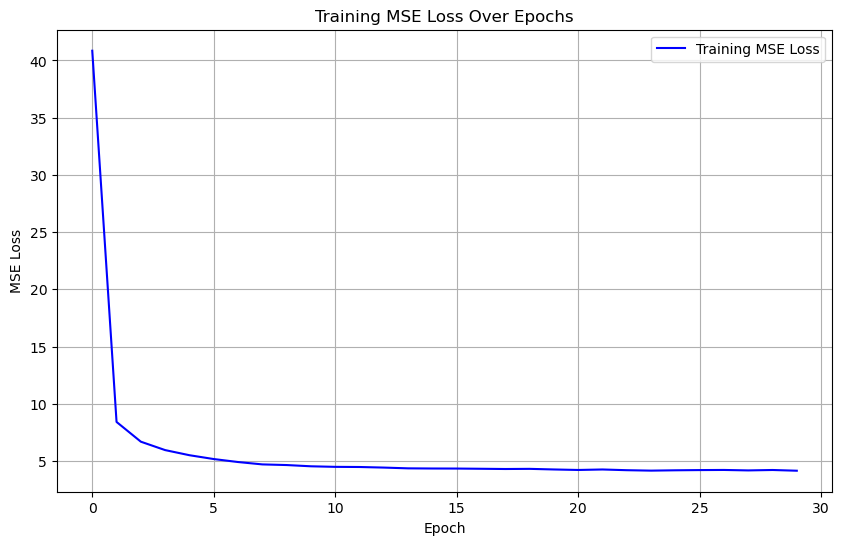

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training MSE Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training MSE Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
rmse = np.sqrt(4)
print("RMSE:", rmse)  # 2.0

RMSE: 2.0


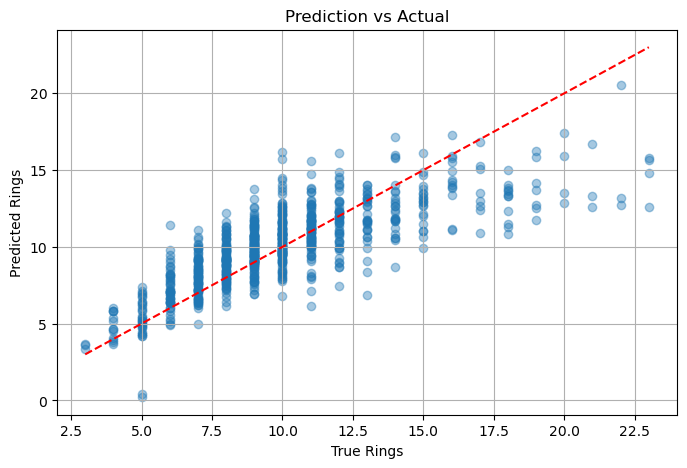

In [117]:
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test, dtype=torch.float32)).numpy()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 완벽한 예측선
plt.xlabel('True Rings')
plt.ylabel('Predicted Rings')
plt.title('Prediction vs Actual')
plt.grid(True)
plt.show()